# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 582


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
import requests
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

     # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto natales
Processing Record 2 of Set 1 | monte alegre
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | ribeira grande
Processing Record 5 of Set 1 | whitehorse
Processing Record 6 of Set 1 | barmer
Processing Record 7 of Set 1 | yellowknife
Processing Record 8 of Set 1 | uturoa
Processing Record 9 of Set 1 | dunedin
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | bethel
Processing Record 13 of Set 1 | aasiaat
Processing Record 14 of Set 1 | chita
Processing Record 15 of Set 1 | fort-shevchenko
Processing Record 16 of Set 1 | porto novo
Processing Record 17 of Set 1 | margaret river
Processing Record 18 of Set 1 | grytviken
Processing Record 19 of Set 1 | edinburgh of the seven seas
Processing Record 20 of Set 1 | ilulissat
Processing Record 21 of Set 1 | tommot
Processing Record 22 of Set 1 

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,9.86,72,73,8.62,CL,1705712077
1,monte alegre,-2.0078,-54.0692,25.92,80,42,1.97,BR,1705712077
2,adamstown,-25.0660,-130.1015,24.43,79,40,6.93,PN,1705712077
3,ribeira grande,38.5167,-28.7000,14.87,90,97,2.68,PT,1705712077
4,whitehorse,60.7161,-135.0538,-25.39,71,20,1.54,CA,1705712003


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,9.86,72,73,8.62,CL,1705712077
1,monte alegre,-2.0078,-54.0692,25.92,80,42,1.97,BR,1705712077
2,adamstown,-25.0660,-130.1015,24.43,79,40,6.93,PN,1705712077
3,ribeira grande,38.5167,-28.7000,14.87,90,97,2.68,PT,1705712077
4,whitehorse,60.7161,-135.0538,-25.39,71,20,1.54,CA,1705712003


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

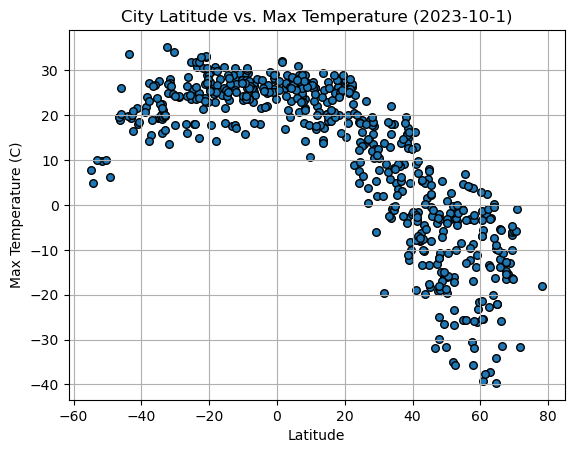

In [9]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind="scatter", x="Lat", y="Max Temp", alpha=1, edgecolors="k", s=30)
# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2023-10-1)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

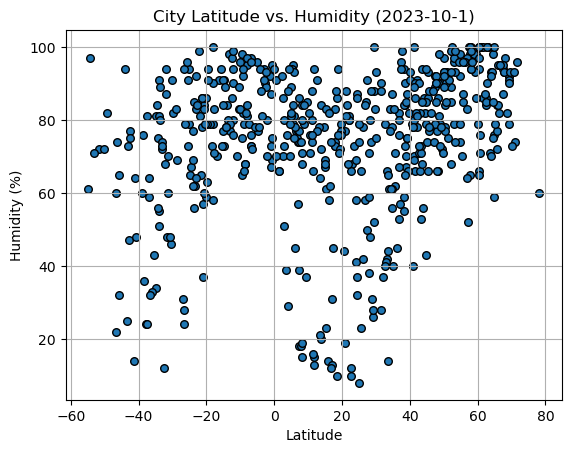

In [10]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind="scatter", x="Lat", y="Humidity", alpha=1, edgecolors="k", s=30)
# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-10-1)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

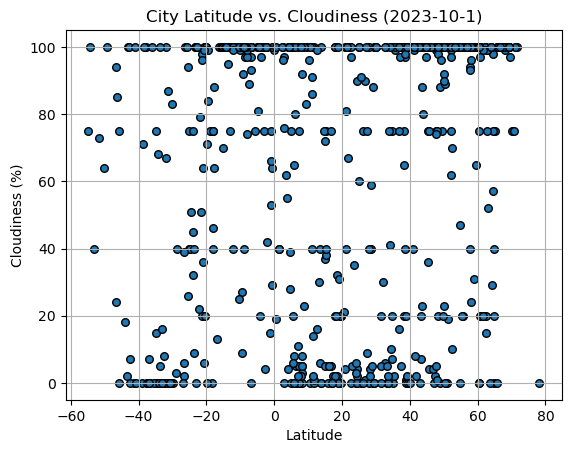

In [11]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness", alpha=1, edgecolors="k", s=30)
# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-10-1)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

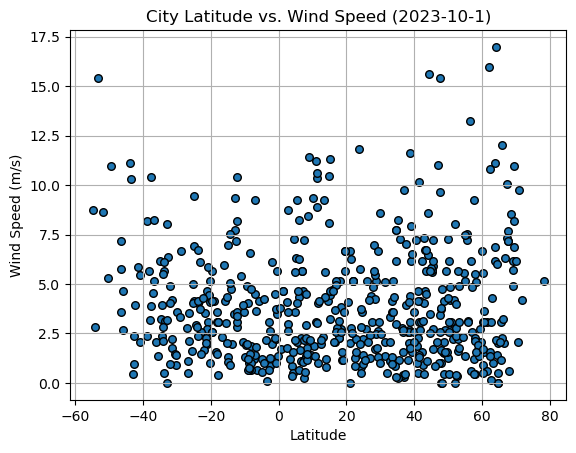

In [12]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed", alpha=1, edgecolors="k", s=30)
# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-10-1)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
#(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,ribeira grande,38.5167,-28.7000,14.87,90,97,2.68,PT,1705712077
4,whitehorse,60.7161,-135.0538,-25.39,71,20,1.54,CA,1705712003
5,barmer,25.7500,71.3833,13.51,23,0,2.72,IN,1705712077
6,yellowknife,62.4560,-114.3525,-22.71,84,20,1.54,CA,1705712078
11,bethel,41.3712,-73.4140,-3.37,70,100,3.09,US,1705711832


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,9.86,72,73,8.62,CL,1705712077
1,monte alegre,-2.0078,-54.0692,25.92,80,42,1.97,BR,1705712077
2,adamstown,-25.0660,-130.1015,24.43,79,40,6.93,PN,1705712077
7,uturoa,-16.7333,-151.4333,28.13,70,13,2.33,PF,1705712078
8,dunedin,-45.8742,170.5036,26.15,65,75,2.68,NZ,1705712078


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8454413046162035


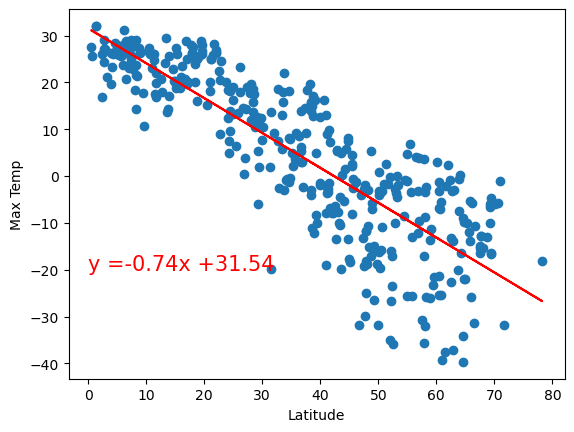

In [20]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
regress_values = intercept + slope * x_values
line_eq = "y =" + str(round(slope, 2)) + "x +" + str(round(intercept, 2))

plt.plot(x_values, regress_values, "-r")
plt.scatter(x_values, y_values)
plt.annotate(line_eq, (0, -20), fontsize=15, color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-value is: {r_value}")

The r-value is: 0.471273568529914


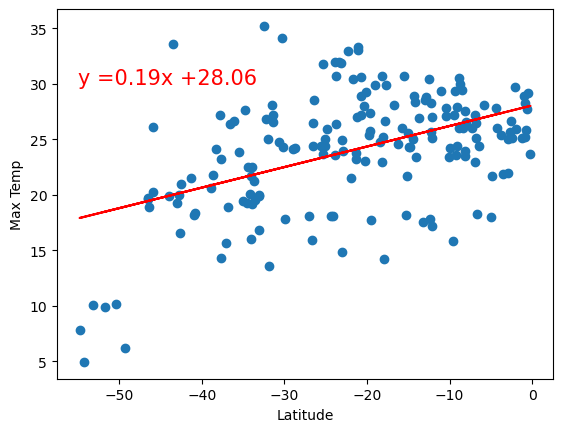

In [40]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
regress_values = intercept + slope * x_values
line_eq = "y =" + str(round(slope, 2)) + "x +" + str(round(intercept, 2))

plt.plot(x_values, regress_values, "-r")
plt.scatter(x_values, y_values)
plt.annotate(line_eq, (-55, 30), fontsize=15, color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-value is: {r_value}")

**Discussion about the linear relationship:** Northern Hemisphere: The linear realtionship between the "Max Temp" and "Latitude" is negative. This regression is showing that when the latitude is increasing moving further from the equator, the max temperature is decreasing. Meaning the further north of the equator the colder the temperature is. 

Southern Hemisphere: This relationship is positive and shows that both the "Latitude" and "Max Tamp" increase in value. Meaning the closer the values get to the equator the warmer it gets. 

In both cases the graphs show that the further you are from the equator the colder the temperatures are. As well as showing that the closer you get to the equator the warmer the temperatures are. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.40451579696085055


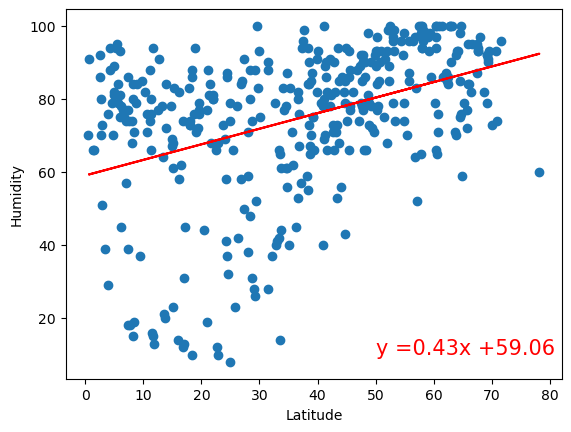

In [29]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
regress_values = intercept + slope * x_values
line_eq = "y =" + str(round(slope, 2)) + "x +" + str(round(intercept, 2))

plt.plot(x_values, regress_values, "-r")
plt.scatter(x_values, y_values)
plt.annotate(line_eq, (50, 10), fontsize=15, color="red")

plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {r_value}")

The r-value is: 0.4584654212007619


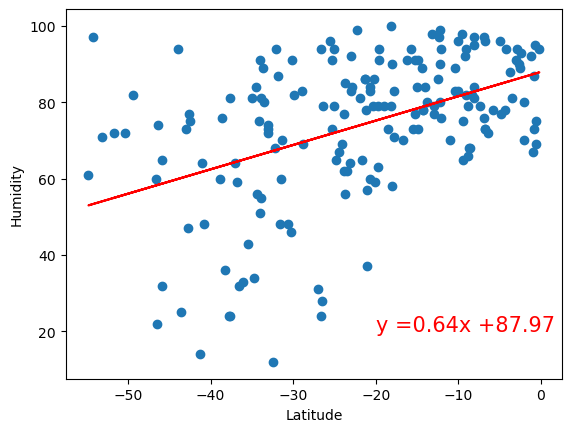

In [34]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
regress_values = intercept + slope * x_values
line_eq = "y =" + str(round(slope, 2)) + "x +" + str(round(intercept, 2))

plt.plot(x_values, regress_values, "-r")
plt.scatter(x_values, y_values)
plt.annotate(line_eq, (-20, 20), fontsize=15, color="red")

plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {r_value}")

**Discussion about the linear relationship:** Both the Northern and Southern Hemispheres have a positive regression between "Humiditiy" and "Latitude". In the northern hemisphere the graph shows many points with high humidity throughout the latitude range. Showing that the linear regression is not a strong correlation becuase it seems to have a higher chance of leveling out the slope. Even though both hemispheres currently have similar r_values the southern hemisphere has a more visual regression of humidity increasing as latitude increases. (getting closer to the equator)

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.31376566070181294


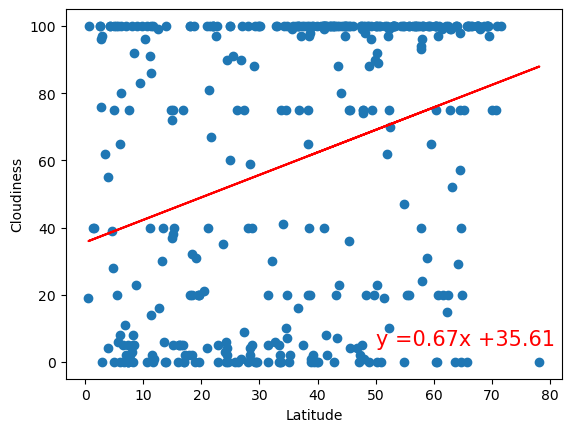

In [39]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
regress_values = intercept + slope * x_values
line_eq = "y =" + str(round(slope, 2)) + "x +" + str(round(intercept, 2))

plt.plot(x_values, regress_values, "-r")
plt.scatter(x_values, y_values)
plt.annotate(line_eq, (50, 5), fontsize=15, color="red")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is: {r_value}")

The r-value is: 0.37514061642699


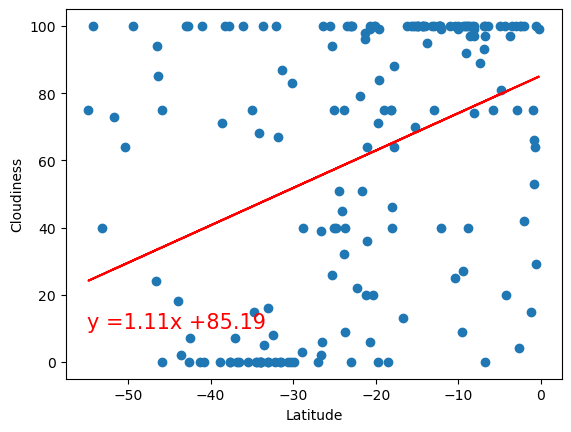

In [43]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
regress_values = intercept + slope * x_values
line_eq = "y =" + str(round(slope, 2)) + "x +" + str(round(intercept, 2))

plt.plot(x_values, regress_values, "r-")
plt.scatter(x_values, y_values)
plt.annotate(line_eq, (-55, 10), fontsize=15, color="red")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is: {r_value}")

**Discussion about the linear relationship:** The relationship for both northern and southern hemisphere for cloudiness is positive. However both relationships have a very low r_value showing that it is a very weak relationship between "Cloudiness" and "Latitude" for both. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0691987030167052


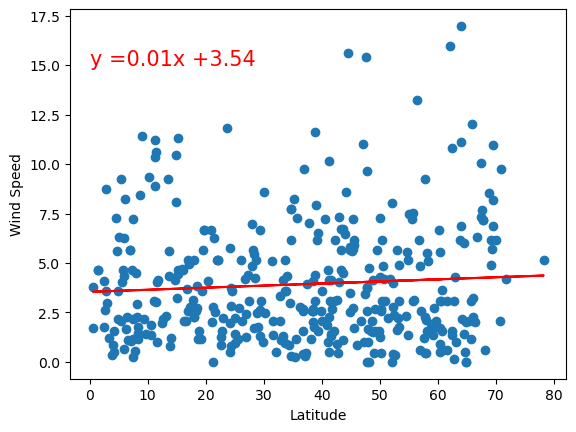

In [45]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
regress_values = intercept + slope * x_values
line_eq = "y =" + str(round(slope, 2)) + "x +" + str(round(intercept, 2))

plt.plot(x_values, regress_values, "-r")
plt.scatter(x_values, y_values)
plt.annotate(line_eq, (0, 15), fontsize=15, color="red")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is: {r_value}")

The r-value is: -0.3372588696425738


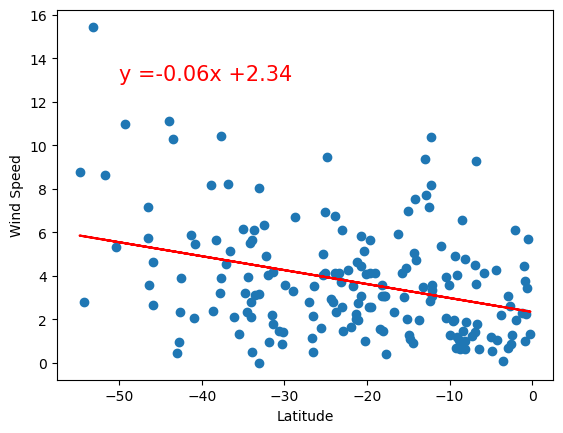

In [47]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
regress_values = intercept + slope * x_values
line_eq = "y =" + str(round(slope, 2)) + "x +" + str(round(intercept, 2))

plt.plot(x_values, regress_values, "r-")
plt.scatter(x_values, y_values)
plt.annotate(line_eq, (-50, 13), fontsize=15, color="red")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is: {r_value}")

**Discussion about the linear relationship:** Northern Hemisphere: the relationship between "Wind Speed" and "Latitude" shows to be positive but the r_value is extremely low resulting in almost no correlation.

Southern Hemisphere: the relationship between "Wind Speed" and "Latitude" shows to be negative, also with a low r_value. the graph seems to show that the wind speed decreases the closer you are to the equator. 